In [1]:
import nltk 
# nltk.download('all')
import numpy as np
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# from nltk.stem.porter import WordNetLemmatizer

In [2]:
import pandas as pd
import httpimport

with httpimport.remote_repo(['lm_helper'], 'https://raw.githubusercontent.com/jasoriya/CS6120-PS2-support/master/utils/'):
  from lm_helper import get_train_data, get_test_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!


In [3]:
# get the train and test data
train = get_train_data()
test, test_files = get_test_data()

## Preprocessing on the corpus

I have performed preprocessing on the corpus -- 


1.   Removed punctuations from the corpus, and transformed all the text in lowercase, as we see since it's a character level modeling if we don't remove the punctuations, they will hold the counts in the unigrams and thus might affect the perplexity scores. Also, I have transformed the text of the corpus to a lowercase as a part of preprocessing as otherwise 'a' and 'A' will have significantly different counts, and that might hurt the perplexity scores of the model
2.   I have also removed the digits from the corpus, as I believe in english and Brazilian or portugese text corpus, the digit doesn't have any significance contextually and hence can be treated as noise and therefore I have removed them.


3.  I have also added the start ['$'] and end tag ['#'], as it enhances the character level modeling.





In [4]:
def formCorpus(train):
    sentence = []
    corpus= []
    for i in train:
        for j in i:
            sen = ' '.join(j)
            trans = sen.translate(str.maketrans('', '',string.punctuation)).lower()
            trans = trans.translate(str.maketrans('', '',string.digits))
            sentence.append('$'+ trans + '#')
    corpus = "".join(sentence)
    return corpus

## Count Statistics -

This function basically calculates the unigram, bigram and Trigram counts and there respective dictionaries from the corpus

In [5]:
def count_statistics(corpus):
    
    char_unigram= [i for i in corpus]
    char_bigram = [corpus[i]+corpus[i+1] for i in range(0,len(corpus)-1)]
    char_trigram = [corpus[i]+corpus[i+1]+corpus[i+2] for i in range(0,len(corpus)-2)]

    unigram_count = Counter(char_unigram)
    bigram_count = Counter(char_bigram)
    del bigram_count[('#$')]
    del bigram_count[('$#')]
    trigram_count = Counter(char_trigram) 

    print(len(unigram_count), unigram_count)
    print(len(bigram_count), bigram_count)
    print(len(trigram_count), trigram_count)
    
    return unigram_count, bigram_count, trigram_count


## 1.1 Collect statistics on the unigram, bigram, and trigram character counts.

In [6]:
def plot_stats(unigram_count, bigram_count, trigram_count ):
  stats = [np.log2(len(unigram_count)), np.log2(len(bigram_count)), np.log2(len(trigram_count))]
  plt.bar(['Unigram', 'Bigram', 'Trigram'], stats)
  plt.ylabel("Counts (LOG SCALE)")
  plt.xlabel("TYPE OF N-GRAM")
  plt.title("Count of n-grams (LOG2 scale)")

34 Counter({' ': 2523233, 'e': 1119617, 't': 827161, 'a': 731203, 'o': 678136, 'h': 650743, 'n': 615091, 'i': 577691, 's': 556863, 'r': 502402, 'd': 400494, 'l': 375313, 'u': 252211, 'm': 230032, 'f': 209239, 'w': 201292, 'c': 185849, 'y': 176040, 'g': 172048, 'b': 139846, 'p': 136173, '$': 98552, '#': 98552, 'v': 83829, 'k': 66676, 'j': 15946, 'x': 9160, 'q': 7552, 'z': 5525, 'è': 2, 'é': 2, '\x1a': 2, 'æ': 2, 'î': 1})
681 Counter({'e ': 428265, '  ': 350122, ' t': 345145, 'th': 330682, 'he': 291390, 'd ': 268085, ' a': 238797, 't ': 217521, 's ': 215597, 'an': 171751, ' s': 169644, 'n ': 157903, 'in': 149734, ' h': 147728, 'er': 140986, ' w': 137122, 'nd': 134521, ' o': 130191, 'r ': 129994, ' i': 126210, 'y ': 121971, 're': 113950, 'ha': 106961, 'o ': 97329, ' b': 96571, 'ou': 96326, ' #': 95932, ' m': 90870, 'at': 89290, 'f ': 86356, 'en': 85802, 'or': 84332, 'hi': 83864, 'on': 82672, ' f': 78613, 'to': 78385, 'of': 78313, 'it': 75776, 'is': 75191, 'h ': 75181, 'ed': 73436, ' c': 7

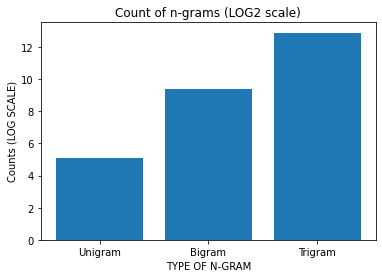

In [7]:
corpus = formCorpus(train)
unigram_count, bigram_count, trigram_count = count_statistics(corpus)
plot_stats(unigram_count, bigram_count, trigram_count )


In [8]:
#Dividing the training data into a new training set (80%) and a held-out set (20%)
X_train, X_test = train_test_split(train, train_size = 0.8, test_size=0.20, random_state=13)

## Statistics for the Train corpus after splitting

31 Counter({' ': 2101877, 'e': 930739, 't': 690354, 'a': 606978, 'o': 558552, 'h': 550858, 'n': 510510, 'i': 473902, 's': 460922, 'r': 414225, 'd': 334861, 'l': 309348, 'u': 204488, 'm': 188982, 'f': 176383, 'w': 163617, 'c': 149888, 'y': 142036, 'g': 141744, 'b': 115476, 'p': 110983, '$': 76690, '#': 76690, 'v': 69972, 'k': 54496, 'j': 14294, 'x': 6954, 'q': 5810, 'z': 4888, '\x1a': 2, 'æ': 2})
662 Counter({'e ': 357451, '  ': 300614, ' t': 294857, 'th': 287065, 'he': 247760, 'd ': 225537, ' a': 200019, 's ': 178597, 't ': 177252, 'an': 145849, ' s': 140816, 'n ': 131456, 'in': 123191, ' h': 120122, 'nd': 116399, 'er': 115157, ' w': 111891, ' o': 110382, 'r ': 105352, ' i': 103583, 'y ': 99331, 're': 94624, 'ha': 89329, ' b': 79897, 'o ': 78957, 'ou': 77441, ' #': 74868, 'f ': 73960, 'at': 73937, ' m': 73207, 'or': 71152, 'en': 70134, 'hi': 69441, 'of': 67934, 'on': 67803, ' f': 65405, 'h ': 64682, 'to': 64148, 'it': 61956, 'is': 61910, 'l ': 59940, ' c': 59438, 'ng': 59400, 'ed': 593

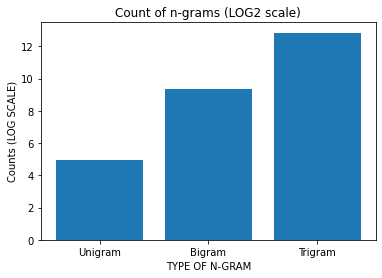

In [9]:
X_train_corpus = formCorpus(X_train)
unigram_count_train, bigram_count_train, trigram_count_train = count_statistics(X_train_corpus)
plot_stats(unigram_count_train, bigram_count_train, trigram_count_train)

## Statistics for the Test Corpus after splitting the dataset

32 Counter({' ': 421356, 'e': 188878, 't': 136807, 'a': 124225, 'o': 119584, 'n': 104581, 'i': 103789, 'h': 99885, 's': 95941, 'r': 88177, 'l': 65965, 'd': 65633, 'u': 47723, 'm': 41050, 'w': 37675, 'c': 35961, 'y': 34004, 'f': 32856, 'g': 30304, 'p': 25190, 'b': 24370, '$': 21862, '#': 21862, 'v': 13857, 'k': 12180, 'x': 2206, 'q': 1742, 'j': 1652, 'z': 637, 'è': 2, 'é': 2, 'î': 1})
613 Counter({'e ': 70814, ' t': 50288, '  ': 49508, 'he': 43630, 'th': 43617, 'd ': 42548, 't ': 40269, ' a': 38778, 's ': 37000, ' s': 28828, ' h': 27606, 'in': 26543, 'n ': 26447, 'an': 25902, 'er': 25829, ' w': 25231, 'r ': 24642, 'y ': 22640, ' i': 22627, ' #': 21064, ' o': 19809, 're': 19326, 'ou': 18885, 'o ': 18372, 'nd': 18122, ' m': 17663, 'ha': 17632, ' b': 16674, 'en': 15668, 'at': 15353, 'on': 14869, 'hi': 14423, 'to': 14237, 'ed': 14044, 'it': 13820, 'is': 13281, ' c': 13278, ' f': 13208, 'or': 13180, 'ng': 13123, 'as': 12612, 'f ': 12396, 'ar': 11506, 'st': 11394, 'll': 11173, 'g ': 11022, 'l

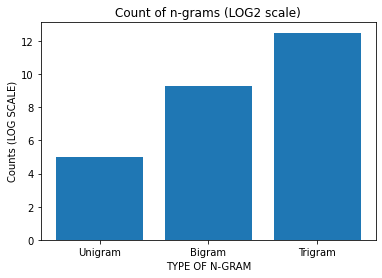

In [10]:
X_test_corpus = formCorpus(X_test)
unigram_count_test, bigram_count_test, trigram_count_test = count_statistics(X_test_corpus)
plot_stats(unigram_count_test, bigram_count_test, trigram_count_test)

## Calculating the Perplexity Values and finding the threshold value and the minimum perplexity value

In [11]:
perplexity  = []
lambdas = []
for i in range(0,10):
  lambda_random = np.random.dirichlet(np.ones(3),size=1).tolist()
  sorted_lambda = (sorted(lambda_random, reverse=True))
  log_prob = 0
  for i, j in trigram_count_test.items():
    probability_test = (trigram_count_train.get(i,0)/bigram_count_train.get(i[:2],1))*sorted_lambda[0][0] + (bigram_count_train.get(i[1:],0)/unigram_count_train.get(i[1],1))*sorted_lambda[0][1] + (unigram_count_train.get(i[2],1)/(sum(unigram_count_train.values())+1))*sorted_lambda[0][2]
    log_prob += np.log2(probability_test)
    lambdas.append(sorted_lambda)
  perplexity.append(2**(-1*(log_prob/len(trigram_count_test))))

threshold = max(perplexity)
print("The 10 Perplexity values are: ",perplexity)
print("Minimum Perplexity value is: ",min(perplexity))
print("Perplexity CUTT OFF Threshold is: ",threshold)

lambda_min=lambdas[perplexity.index(min(perplexity))]
print("The three Lambda values are: ",lambda_min)

The 10 Perplexity values are:  [31.115626279914846, 32.1501931395023, 31.151205408352006, 27.510290077483255, 29.469083337332982, 26.906731586469512, 29.50175826999654, 28.051206776930517, 27.315844477112506, 28.159321548111553]
Minimum Perplexity value is:  26.906731586469512
Perplexity CUTT OFF Threshold is:  32.1501931395023
The three Lambda values are:  [[0.50339345576056, 0.38818232461119456, 0.10842421962824525]]


## 1.2
Calculate the perplexity for each document in the test set using the linear interpolation smoothing method. For determining λs for linear interpolation of the trigram, bigram, and unigram models, you can divide the training data into a new training set (80%) and a held-out set (20%).
Then choose ~10 random pairs of $(\lambda_3, \lambda_2)$ such that $1 > \lambda_3 > \lambda_2 > 0$ and $\sum_{i=1}^3 \lambda_i = 1$ to test on held-out data.

Some documents in the test set are in Brazilian Portuguese. Identify them as follows: 
  - Sort by perplexity and set a cut-off threshold. All the documents above this threshold score should be categorized as Brazilian Portuguese. 
  - Print the file names (from `test_files`) and perplexities of the documents above the threshold

    ```
        file name, score
        file name, score
        . . .
        file name, score
    ```

  - Copy this list of filenames and manually annotate them as being correctly or incorrectly labeled as Portuguese.


In [12]:
n_files = 0
print("Scores for different files:\n")

for i in range(len(test)):
  test_list=[]
  for j in test[i]:
    ###### Preprocessing Block ######
    sen = ' '.join(j)
    trans = sen.translate(str.maketrans('', '',string.punctuation)).lower()
    trans = trans.translate(str.maketrans('', '',string.digits))
    test_list.append('$'+ trans + '#')
    ###### End of Preprocessing Block #######
  test_corpus =''.join(test_list)
  trigram = [test_corpus[i]+test_corpus[i+1]+test_corpus[i+2] for i in range(0,len(test_corpus)-2)]
  heldout =Counter(trigram)
  log_prob = 0
  for key,each in heldout.items():
    final_prob =(trigram_count.get(key,0)*lambda_min[0][0]/bigram_count.get(key[:2],1)) + (bigram_count.get(key[1:],0)*lambda_min[0][1] /unigram_count.get(key[1],1)) + (unigram_count.get(key[2],1)*lambda_min[0][2]/(sum(unigram_count.values())+1))
    log_prob += np.log2(final_prob)
  perplexity=2**(-1*(log_prob/len(heldout)))
  if perplexity > threshold:
    print("File names",test_files[i],"-> Perplexity Score:",perplexity)
    n_files+=1
print("\nTotal files being correctly or incorrectly labeled as Portuguese: ",n_files)  

Scores for different files:

File names br94ab02.txt -> Perplexity Score: 136.81390502385062
File names ag94ou04.txt -> Perplexity Score: 82.64522888096242
File names ag94mr1.txt -> Perplexity Score: 87.08864672478228
File names ag94ag02.txt -> Perplexity Score: 89.35209632421572
File names ag94se06.txt -> Perplexity Score: 60.74692624496438
File names ag94no01.txt -> Perplexity Score: 86.64393257836764
File names br94ju01.txt -> Perplexity Score: 141.4090748008126
File names ag94ma03.txt -> Perplexity Score: 97.58325421114911
File names ag94jl12.txt -> Perplexity Score: 83.96863570323784
File names br94ma01.txt -> Perplexity Score: 153.92823819577995
File names ag94de06.txt -> Perplexity Score: 102.2654833192413
File names br94de01.txt -> Perplexity Score: 133.73934467009056
File names ag94ja11.txt -> Perplexity Score: 82.69819485392114
File names br94jl01.txt -> Perplexity Score: 99.06630048112574
File names br94fe1.txt -> Perplexity Score: 114.75531519814044
File names br94ag01.txt 

## 1.3
Build a trigram language model with add-λ smoothing (use λ = 0.1).

Sort the test documents by perplexity and perform a check for Brazilian Portuguese documents as above:

  - Observe the perplexity scores and set a cut-off threshold. All the documents above this threshold score should be categorized as Brazilian Portuguese. 
  - Print the file names and perplexities of the documents above the threshold

  ```
      file name, score
      file name, score
      . . .
      file name, score
  ```

  - Copy this list of filenames and manually annotate them for correctness.

In [13]:
const = 0.1
n_files = 0
print("Scores for different files:\n")
for i in range(len(test)):
  test_file=[]
  for token in test[i]:
    ###### Preprocessing Block ######
    sen = ' '.join(token)
    trans = sen.translate(str.maketrans('', '',string.punctuation)).lower()
    test_file.append('$'+ trans + '#')
    trans = trans.translate(str.maketrans('', '',string.digits))
    ###### End of Preprocessing Block #######
  test_corpus = ' '.join(test_file)
  trigram = [test_corpus[i]+test_corpus[i+1]+test_corpus[i+2] for i in range(0,len(test_corpus)-2)]
  test_corpus_counter=Counter(trigram)
  sum_logProb = 0
  for key,ele in test_corpus_counter.items():
    triModel = (trigram_count.get(key,0)+const)/((bigram_count.get(key[:2],1)) + const*len(trigram_count))
    sum_logProb += np.log2(triModel)

  perplexity=2**(-1*(sum_logProb/len(test_corpus_counter)))
  # print(perplexity)
  if perplexity > 55: ## decided 55 on the basis of observing the perplexity values 
    print("File name",test_files[i],"-> Score:",perplexity)
    n_files += 1
print("\nTotal files and documents that are above the threshold: ",n_files)

Scores for different files:

File name br94ab02.txt -> Score: 410.33304464474725
File name ag94ou04.txt -> Score: 286.5703878988428
File name ag94mr1.txt -> Score: 336.0293023445327
File name ag94ag02.txt -> Score: 332.55990590672417
File name ag94se06.txt -> Score: 230.72318688811265
File name ag94no01.txt -> Score: 326.87478605093804
File name br94ju01.txt -> Score: 462.0841591670445
File name ag94ma03.txt -> Score: 311.2999971108892
File name ag94jl12.txt -> Score: 299.88138897267214
File name br94ma01.txt -> Score: 508.8353492624307
File name ag94de06.txt -> Score: 373.58403856004065
File name br94de01.txt -> Score: 439.031195241784
File name ag94ja11.txt -> Score: 264.7843822997786
File name br94jl01.txt -> Score: 304.80308271202995
File name br94fe1.txt -> Score: 372.73177233461246
File name br94ag01.txt -> Score: 292.0920809369426
File name ag94ab12.txt -> Score: 385.2318602617184
File name br94ja04.txt -> Score: 394.2058220590483
File name ag94fe1.txt -> Score: 322.624082186455

## KEY OBSERVATIONS

Both the methods Linear Interpolation and Trigram model with add-$\lambda$
correctly classifies Brazilian Portuguese documents as can be seen from the results above.
1.   Linear Interpolation Method : Here we considered all three unigrams, bigram and trigrams. We get three values for lambdas, the lambda is highest for the trigram. We can use this technique to get the model which is a best combinations of all three unigram, bigram and trigram and due to which it facilitates a chance that non-English text can also be predicted with significant certainity.
2.   Trigram language model with add-λ (0.1) smoothing - Here we can observe that adding the smoothning parameter reduces the variance. However, non-English text as the model above is trained to predict the English character's model performs poorly with Brazilian/ Portuguese documents even after knowing the previous two words. Hence we find a high difference in the perplexity of English vs Portuguese documents


